In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import time
# magic word for producing visualizations in notebook
%matplotlib inline

#scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [2]:
# load in the data
train = pd.read_csv('data/train.csv', sep=',')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
missing_df = pd.Series(train.isna().sum(), name='number').to_frame()
missing_df = missing_df.assign(percentage=lambda x: round((x.number/train.shape[0]), 2))
missing_df

,number,percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,0.20
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [6]:
train = train.drop(['Cabin'],axis=1)
train = train.drop(['Name'],axis=1)

In [7]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [8]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

In [9]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


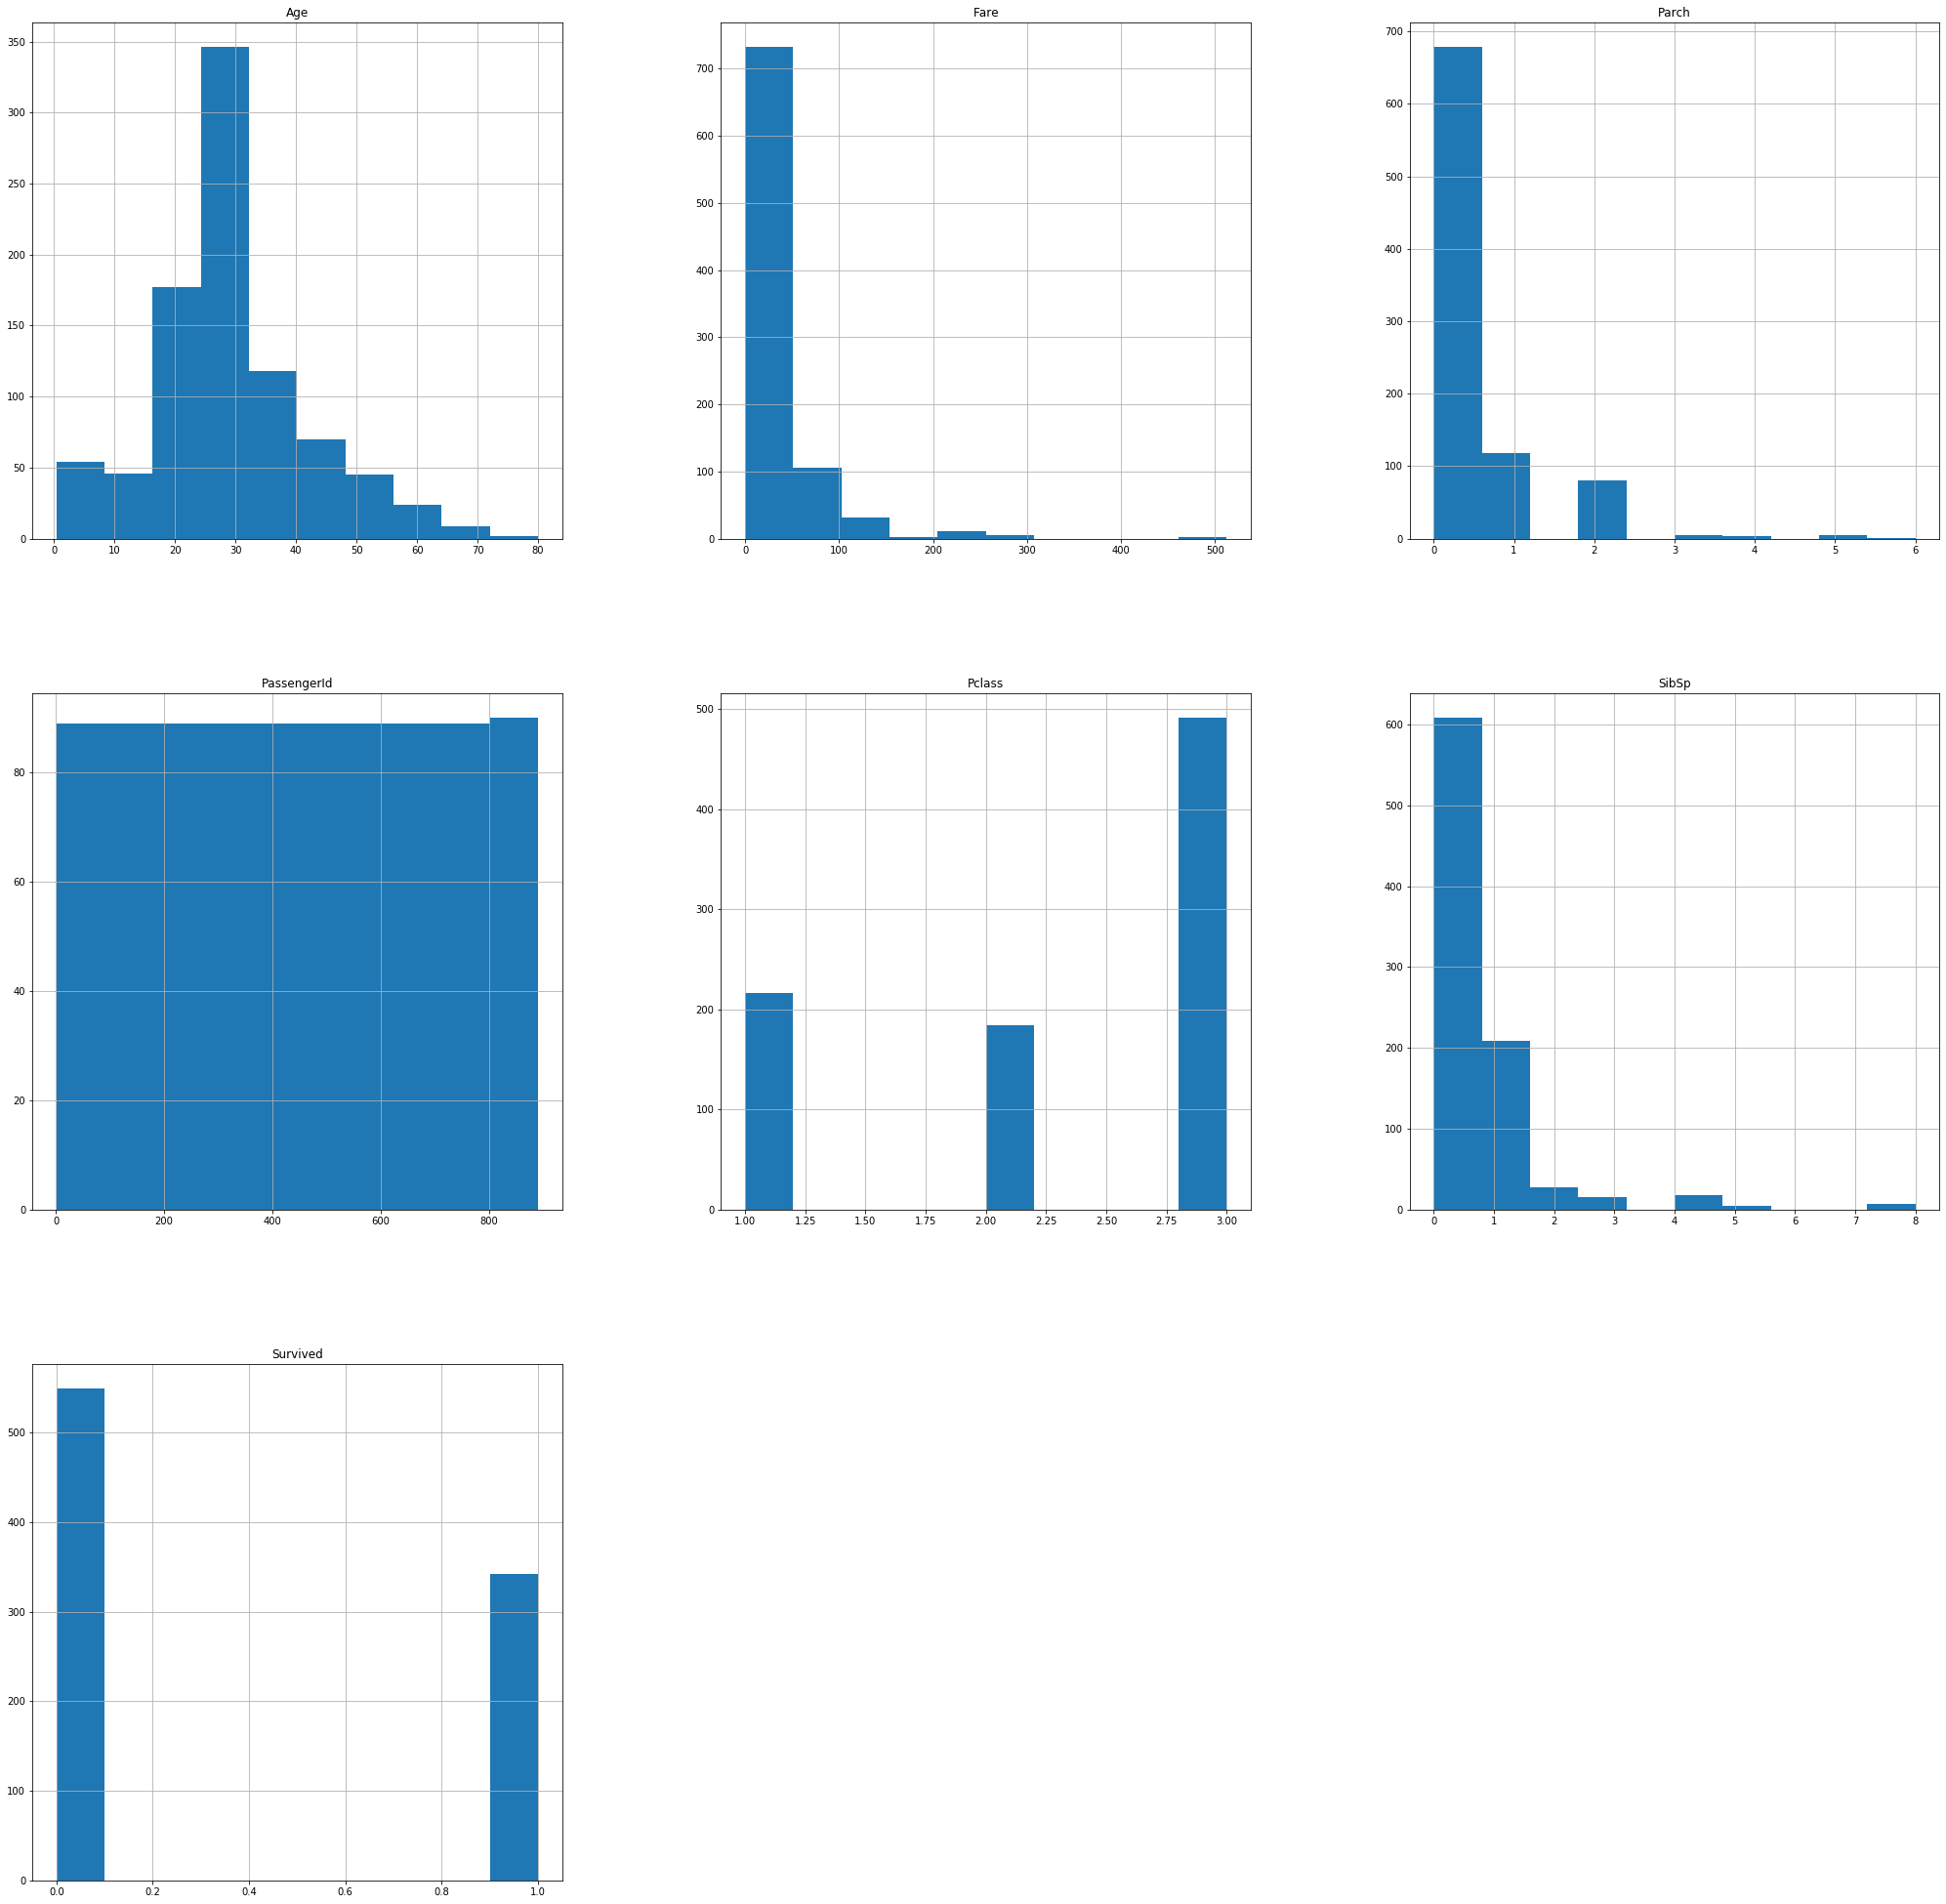

In [10]:
train.hist(figsize = (35,35))
plt.show()

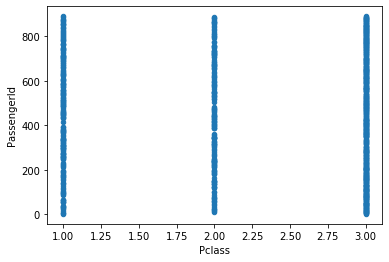

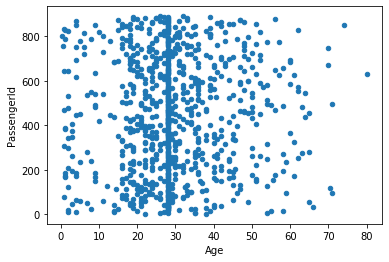

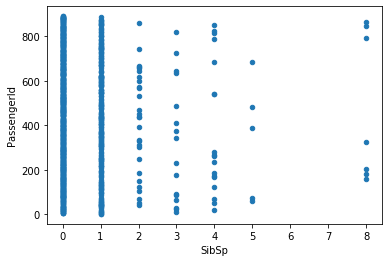

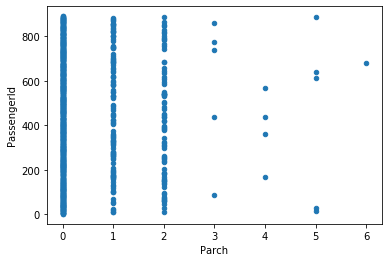

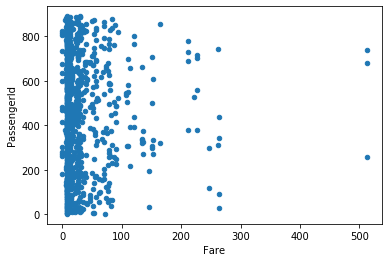

In [11]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for column in columns:
    train.plot(x=column, y='PassengerId', kind='scatter')
    #sns.boxplot(x=train[column])

In [12]:
lower = train['Fare'].quantile(0.15)

upper = train['Fare'].quantile(0.85)
#print(lower, upper)
train.loc[(train['Fare'] < lower),'Fare'] = lower

train.loc[(train['Fare'] > upper),'Fare'] = upper


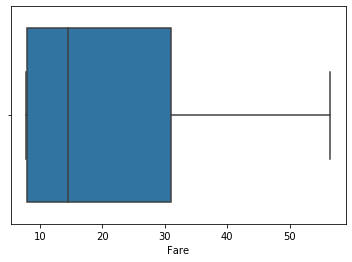

In [13]:
sns.boxplot(x=train['Fare'])

In [14]:
train['Age_bin'] = pd.cut(train['Age'], bins=[0,15,30,45,60,100], labels=["Kid", "Young", "Adult", 'Middle-Aged', "Old"])

In [15]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,1,0,3,male,22.0,1,0,A/5 21171,7.7500,S,Young
1,2,1,1,female,38.0,1,0,PC 17599,56.4958,C,Adult
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Adult


In [16]:
train = train.drop(['Age'],axis=1)

In [17]:
def label_encoding(df):
    labelencoder = LabelEncoder()
    columns = ['Sex', 'Ticket', 'Embarked', 'Age_bin']
    for column in columns:
        df[column] = labelencoder.fit_transform(df[column])

In [18]:
label_encoding(train)

In [19]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,1,0,3,1,1,0,523,7.7500,2,4
1,2,1,1,0,1,0,596,56.4958,0,0
2,3,1,3,0,0,0,669,7.9250,2,4
3,4,1,1,0,1,0,49,53.1000,2,0
4,5,0,3,1,0,0,472,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,101,13.0000,2,4
887,888,1,1,0,0,0,14,30.0000,2,4
888,889,0,3,0,1,2,675,23.4500,2,4
889,890,1,1,1,0,0,8,30.0000,0,4


In [20]:
for column in train.columns:
    print(train[column].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

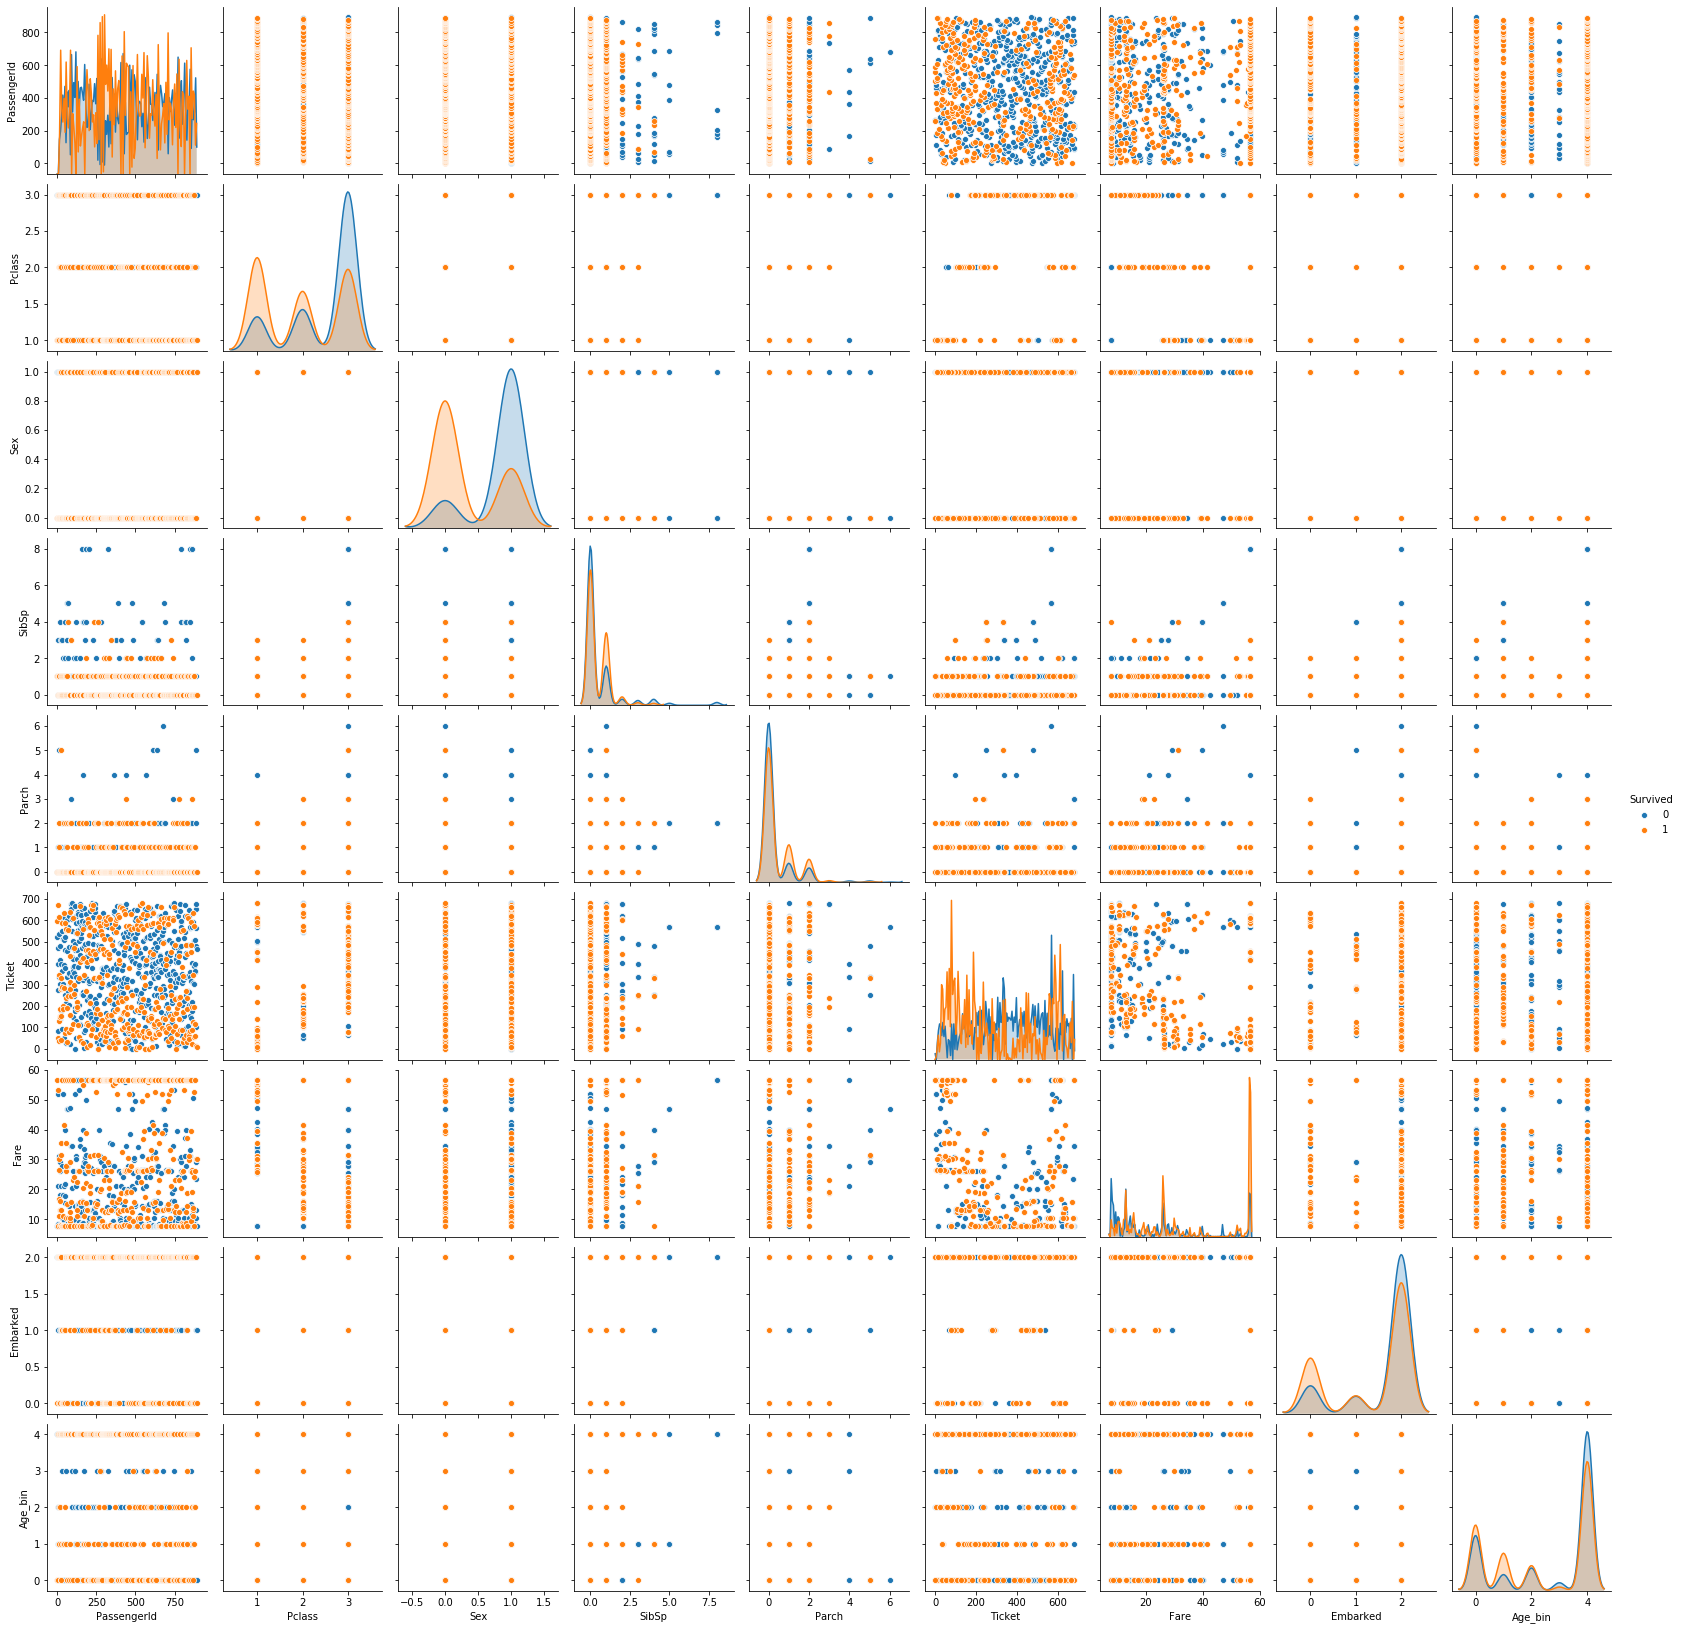

In [21]:
import seaborn as sns
sns.pairplot(train, hue="Survived", diag_kws={'bw': 0.2})

In [22]:
passengerId = pd.DataFrame(train['PassengerId'].values,columns=['PassengerId'])
train_Y=pd.DataFrame(train['Survived'].values,columns=['Survived'])
train_X=train.drop(['PassengerId','Survived'],axis=1)

In [23]:
scaler = StandardScaler()
scale=scaler.fit(train_X)
X_scaled=scaler.transform(train_X)

In [24]:
def sklearn_pca(data, n_components=None):
    '''This function builds the scikit-learn PCA model. 
    Args: 
    data: demographic dataframe
    n_components: number of components
    returns: 
    pca: pca model
    data_transformed: transformed data
    '''
    pca = PCA(n_components)
    data_transformed = pca.fit_transform(data)
    return pca, data_transformed

In [25]:
def plot_variance_sklearn(pca):
    '''This function plots the graph of the explained variance ratio. 
    Args: 
    pca: pca model
    returns: none
    '''
    exp_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(exp_variance)
    plt.xlabel('No of Components')
    plt.ylabel('Explained Variance')
    plt.title('Explained Variance Ratio')
    plt.grid(b=True)
    plot = plt.show()

In [26]:
pca_model, pca_transformed = sklearn_pca(X_scaled)

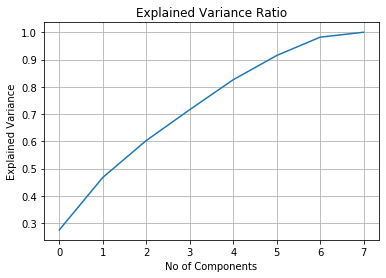

In [27]:
plot_variance_sklearn(pca_model)


In [28]:
pca_model, pca_transformed = sklearn_pca(X_scaled, 5)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, train_Y, test_size=0.3)

In [30]:
print(X_train.shape)
print(X_val.shape)

(623, 8)
(268, 8)


In [31]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = lr.predict_proba(X_val)[:,1]
print('Logistic regression ROC-AUC: {:.2f}'.format(roc_auc_score(y_val, y_pred)))

Logistic regression ROC-AUC: 0.82


In [33]:
def model_trainer(model, X_train, y_train, X_val, y_val):
    '''This function customization of the fit method.
    Args: 
    model: instantiated model from the list of the classifiers
    X_train: training data
    y_train: training labels
    X_val: validation data
    y_val: validation labels
    returns: ROC-AUC score, training time
    '''
    t = time.time()
    model = model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict_proba(X_val)[:,1]
    
    roc_score = round(roc_auc_score(y_val, y_pred), 2)

    train_time = time.time() - t
    
    return roc_score, train_time

In [34]:
def run_multiple(classifiers, X_train, y_train, X_val, y_val):
    '''This function itterated over declared classifiers and 
    calls the custome fit method.
    Args: 
    classifiers: the list of the classifiers
    X_train: training data
    y_train: training labels
    X_val: validation data
    y_val: validation labels
    returns: dataframe of results for comparison
    '''
    result={
    'classifier':[],
    'score':[],
    'train_time':[]
    }
    for name, classifier in classifiers:
        score, t = model_trainer(classifier, X_train, y_train, X_val, y_val)
        result['classifier'].append(name)
        result['score'].append(score)
        result['train_time'].append(t)
    results_df = pd.DataFrame.from_dict(result, orient='index').transpose()
    return results_df

In [35]:
classifiers = [
    ("XGBClassifier",xgb.XGBClassifier(random_state=42)),
    ("Nearest Neighbors", KNeighborsClassifier(3)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoostingClassifier", GradientBoostingClassifier(random_state=42))
]

In [36]:
run_multiple(classifiers, X_train, y_train, X_val, y_val)

,classifier,score,train_time
0,XGBClassifier,0.86,0.0478706
1,Nearest Neighbors,0.79,0.00598383
2,Decision Tree,0.76,0.00398946
3,Random Forest,0.86,0.161597
4,AdaBoost,0.83,0.0827775
5,GradientBoostingClassifier,0.87,0.0977125


In [48]:
XGB_param_dict = {
    'n_estimators': range(20, 200, 20),
    'max_depth': range(5, 15, 1),
    'eta': [0.05, 0.1, 0.2],
    'min_child_weight': (1, 12, 2)
}
xgbgrid = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.05, random_state=42),
                     param_grid = XGB_param_dict,
                     scoring = "roc_auc",
                     cv = 5,
                     n_jobs=-1, 
                     verbose=2)

In [49]:
%%time
xgbgrid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   56.9s


Wall time: 59.9 s


[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   59.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.05, 0.1, 0.2], 'max_depth': range(5, 15),
                         'min_child_weight': (1, 12, 2),
                         'n_estimators': ra

In [50]:
xgbgrid.best_score_, xgbgrid.best_params_

(0.8570516799152094,
 {'eta': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 20})

In [132]:
GB_param_dict = {
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]
}
gbgrid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.03,
                                                             max_features='sqrt',
                                                             max_depth=4,
                                                             min_samples_leaf=10,
                                                             min_samples_split=60,
                                                             n_estimators=50,
                                                             random_state=42),
                     param_grid = GB_param_dict,
                     scoring = "roc_auc",
                     cv = 5,
                     n_jobs=-1, 
                     verbose=2)

In [133]:
%%time
gbgrid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Wall time: 329 ms


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.03,
                                                  loss='deviance', max_depth=4,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=60,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=50,
                                                  n_iter_no_change=None,
     

In [134]:
gbgrid.best_score_, gbgrid.best_params_

(0.8694294647588766, {'subsample': 0.8})

In [137]:
best_gb = GradientBoostingClassifier(learning_rate=0.03,
                                                             max_features='sqrt',
                                                             max_depth=4,
                                                             min_samples_leaf=10,
                                                             min_samples_split=60,
                                                             n_estimators=50,
                                                             subsample=0.8,
                                                             random_state=42)

In [138]:
%%time
best_gb.fit(X_train, y_train.values.ravel())

Wall time: 45.9 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.03, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=60,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
y_pred = best_gb.predict_proba(X_val)[:,1]
print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(best_xgb.score(X_val, y_val)))
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_val, y_pred)))

Accuracy of logistic regression classifier on validation set: 0.81
ROC-AUC: 0.85


Text(0, 0.5, 'Feature Importance Score')

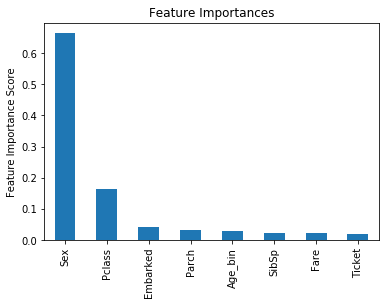

In [140]:
feat_imp = pd.Series(best_xgb.feature_importances_, train_X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [214]:
test = pd.read_csv('data/test.csv', sep=',')

In [215]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [216]:
passengerId = test['PassengerId']
test=test.drop(['PassengerId','Name', 'Cabin'],axis=1)

In [217]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Embarked'].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)

In [218]:
lower = test['Fare'].quantile(0.15)

upper = test['Fare'].quantile(0.85)
#print(lower, upper)
test.loc[(test['Fare'] < lower),'Fare'] = lower

test.loc[(test['Fare'] > upper),'Fare'] = upper

In [219]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.7500,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,60.0000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.7500,S
416,3,male,27.0,0,0,359309,8.0500,S


In [220]:
test['Age_bin'] = pd.cut(test['Age'], bins=[0,15,30,45,60,100], labels=["Kid", "Young", "Adult", 'Middle-Aged', "Old"])

In [221]:
test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,3,male,34.5,0,0,330911,7.8292,Q,Adult
1,3,female,47.0,1,0,363272,7.7500,S,Middle-Aged
2,2,male,62.0,0,0,240276,9.6875,Q,Old
3,3,male,27.0,0,0,315154,8.6625,S,Young
4,3,female,22.0,1,1,3101298,12.2875,S,Young
...,...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,A.5. 3236,8.0500,S,Young
414,1,female,39.0,0,0,PC 17758,60.0000,C,Adult
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.7500,S,Adult
416,3,male,27.0,0,0,359309,8.0500,S,Young


In [222]:
test = test.drop(['Age'],axis=1)

In [223]:
label_encoding(test)

In [224]:
test

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_bin
0,3,1,0,0,152,7.8292,1,0
1,3,0,1,0,221,7.7500,2,2
2,2,1,0,0,73,9.6875,1,3
3,3,1,0,0,147,8.6625,2,4
4,3,0,1,1,138,12.2875,2,4
...,...,...,...,...,...,...,...,...
413,3,1,0,0,267,8.0500,2,4
414,1,0,0,0,324,60.0000,0,0
415,3,1,0,0,346,7.7500,2,0
416,3,1,0,0,220,8.0500,2,4


In [225]:
scale=scaler.fit(test)
test_scaled=scaler.transform(test)
test_scaled=pd.DataFrame(test_scaled, columns = test.columns)

In [226]:
test_scaled.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age_bin     0
dtype: int64

In [227]:
solution_pred = best_gb.predict(test_scaled)

In [228]:
passengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [229]:
data = {'Survived': solution_pred}
solution_df = pd.DataFrame(index=passengerId, data=data)

In [230]:
solution_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [231]:
solution_df.to_csv("./submissions/GradientBoostingClassifier_s1.csv")